# Import data

In [133]:
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('train.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds\n")
print("Number of rows : ",df.shape[0]," and the number of columns : ",df.shape[1])
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.48 seconds

Number of rows :  223084  and the number of columns :  20

Missing values: 45671
Duplicated values: 0

Missing values by column:
ID                                            0
History of HeartDisease or Attack          1694
High Blood Pressure                           0
Told High Cholesterol                     32186
Cholesterol Checked                           0
Body Mass Index                           11782
Smoked 100+ Cigarettes                        1
Diagnosed Stroke                              0
Diagnosed Diabetes                            3
Leisure Physical Activity                     0
Heavy Alcohol Consumption                     0
Health Care Coverage                          0
Doctor Visit Cost Barrier                     1
General Health                                1
Difficulty Walking                            3
Sex                                           0
Educat

In [134]:
df = df.dropna(subset=["History of HeartDisease or Attack"])

In [135]:
df.rename(columns={
    'History of HeartDisease or Attack': 'HeartDisease',
    'High Blood Pressure': 'BloodPressure',
    'Told High Cholesterol': 'High_Cholesterol',
    'Cholesterol Checked': 'Cholesterol_Checked',
    'Body Mass Index': 'BMI',
    'Smoked 100+ Cigarettes': 'Smoked',
    'Diagnosed Stroke': 'Stroke',
    'Diagnosed Diabetes': 'Diabetes',
    'Leisure Physical Activity': 'Exercise_Activity',
    'Vegetable or Fruit Intake (1+ per Day)': 'Fruit_Intake',
    'Heavy Alcohol Consumption': 'Alcohol_Consumption',
    'Health Care Coverage': 'Health_Care',
    'Doctor Visit Cost Barrier': 'Doctor_Visit_Cost_Barrier',
    'General Health': 'General_Health',
    'Difficulty Walking': 'Difficulty_Walking',
    'Sex': 'Sex',
    'Age': 'Age',
    'Education Level': 'Education',
    'Income Level': 'Income'
}, inplace=True)


In [136]:
numerical_columns = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['BMI', 'Age']
Categorical Columns: ['ID', 'HeartDisease', 'BloodPressure', 'High_Cholesterol', 'Cholesterol_Checked', 'Smoked', 'Stroke', 'Diabetes', 'Exercise_Activity', 'Alcohol_Consumption', 'Health_Care', 'Doctor_Visit_Cost_Barrier', 'General_Health', 'Difficulty_Walking', 'Sex', 'Education', 'Income', 'Fruit_Intake']


# Analysis

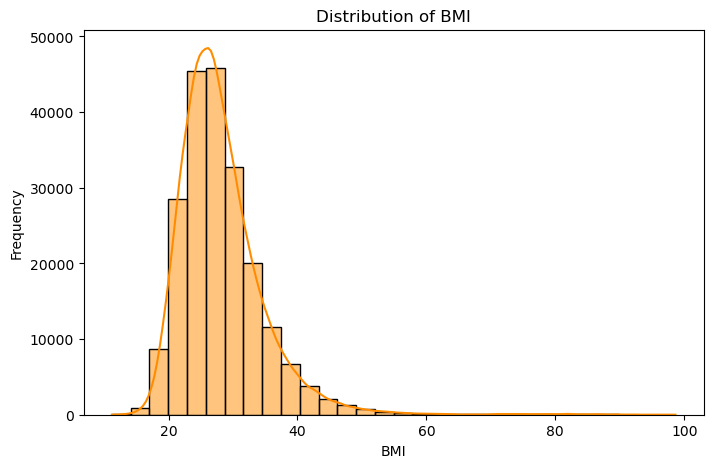

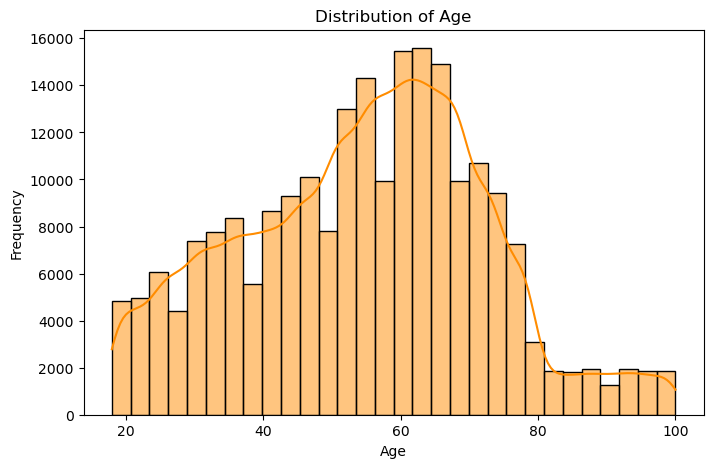

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histograms(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], bins=30, kde=True, color='#ff8c00')  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


numerical_columns = ['BMI', 'Age']
plot_histograms(df, numerical_columns)

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_categorical_distributions(Categorical_Columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(Categorical_Columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    plt.tight_layout()
    plt.show()
    print(data[Categorical_Columns].value_counts())

In [139]:
import pandas as pd
import numpy as np
import re


def parse_income_range(text):
    text = text.strip()
    text = text.lstrip("(")
    

    m = re.match(r"^\$([\d,]+)\s+or\s+more", text, re.IGNORECASE)
    if m:
        income_min = int(m.group(1).replace(",", ""))
        income_max = 75000 # ไม่รู้อ่ะ เอาเท่านั้นไปแล้วกัน
        return pd.Series([income_min, income_max])

    m = re.match(r"^\$([\d,]+)\s+to\s+(?:less than\s+)?\$([\d,]+)", text, re.IGNORECASE)
    if m:
        income_min = int(m.group(1).replace(",", ""))
        income_max = int(m.group(2).replace(",", ""))
        return pd.Series([income_min, income_max])
    
    m = re.match(r"^Less\s+than\s+\$([\d,]+)", text, re.IGNORECASE)
    if m:
        income_min = 3600 # เงินรายชั่วโมงขั้นต่ำ 15 $ ต่อชั่วโมง 15 * 8 * 30
        income_max = int(m.group(1).replace(",", ""))
        return pd.Series([income_min, income_max])
    
    return pd.Series([3600, 10000])

df[['income_min', 'income_max']] = df['Income'].apply(parse_income_range)

print(df[['Income', 'income_min', 'income_max']].head())
df = df.drop(columns=['Income','ID'])

                         Income  income_min  income_max
0  $15,000 to less than $20,000       15000       20000
1             Less than $10,000        3600       10000
2               $75,000 or more       75000       75000
3  $35,000 to less than $50,000       35000       50000
5               $75,000 or more       75000       75000


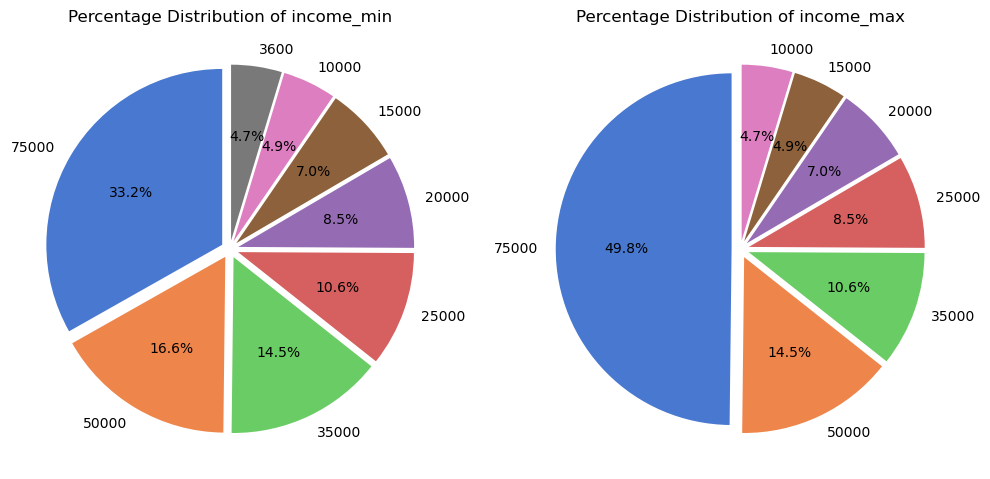

income_min  income_max
75000       75000         73468
50000       75000         36831
35000       50000         32141
25000       35000         23416
20000       25000         18864
15000       20000         15477
10000       15000         10878
3600        10000         10315
Name: count, dtype: int64


In [140]:
columns_to_plot = ['income_min','income_max']
plot_categorical_distributions(columns_to_plot)

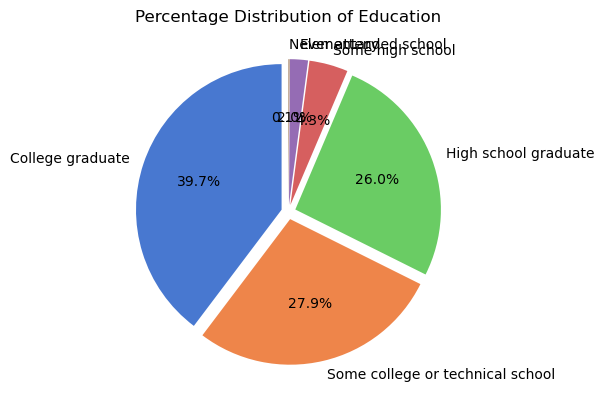

Education                       
College graduate                    87903
Some college or technical school    61833
High school graduate                57491
Some high school                     9522
Elementary                           4404
Never attended school                 237
Name: count, dtype: int64


In [141]:
columns_to_plot = ['Education']
plot_categorical_distributions(columns_to_plot)

In [503]:
df['Education'] = df['Education'].replace({
    'Some college or technical school': 'technical school',
    'Some high school': 'High school graduate'
})

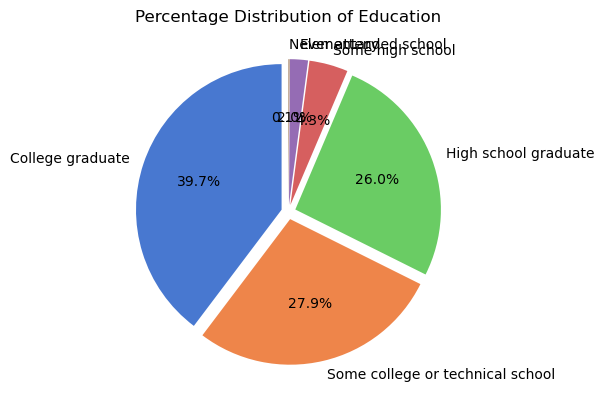

Education                       
College graduate                    87903
Some college or technical school    61833
High school graduate                57491
Some high school                     9522
Elementary                           4404
Never attended school                 237
Name: count, dtype: int64


In [504]:
columns_to_plot = ['Education']
plot_categorical_distributions(columns_to_plot)

In [505]:
df['Smoked'] = df['Smoked'].fillna(df['Smoked'].mode()[0])
df['Diabetes'] = df['Diabetes'].fillna(df['Diabetes'].mode()[0])
df['Doctor_Visit_Cost_Barrier'] = df['Doctor_Visit_Cost_Barrier'].fillna(df['Doctor_Visit_Cost_Barrier'].mode()[0])
df['General_Health'] = df['General_Health'].fillna(df['General_Health'].mode()[0])
df['Difficulty_Walking'] = df['Difficulty_Walking'].fillna(df['Difficulty_Walking'].mode()[0])

In [506]:
df['High_Cholesterol'] = df['High_Cholesterol'].fillna(df['High_Cholesterol'].mode()[0])

In [507]:
import numpy as np
df['BMI'] = df['BMI'].apply(lambda x: np.random.uniform(18, 26) if np.isnan(x) else x) # ระหว่าง 16.50 - 22.90

In [ ]:
def categorize_BMI(row):
    if row['Sex'] == 'Male':
        if row['BMI'] < 18.5:
            return 0  
        elif 18.5 <= row['BMI'] <= 24.9:
            return 0
        elif 25 <= row['BMI'] <= 29.9:
            return 1  
        elif 30 <= row['BMI'] <= 34.9:
            return 2   
        elif 35 <= row['BMI'] <= 39.9:
            return 3  
        else:
            return 4   
    else:
        if row['BMI'] < 18.5:
            return 0  
        elif 18.5 <= row['BMI'] <= 23.9:
            return 0  
        elif 24 <= row['BMI'] <= 28.9:
            return 1  
        elif 29 <= row['BMI'] <= 34.9:
            return 2   
        elif 35 <= row['BMI'] <= 39.9:
            return 3   
        else:
            return 4   

df['BMI Category'] = df.apply(categorize_BMI, axis=1)

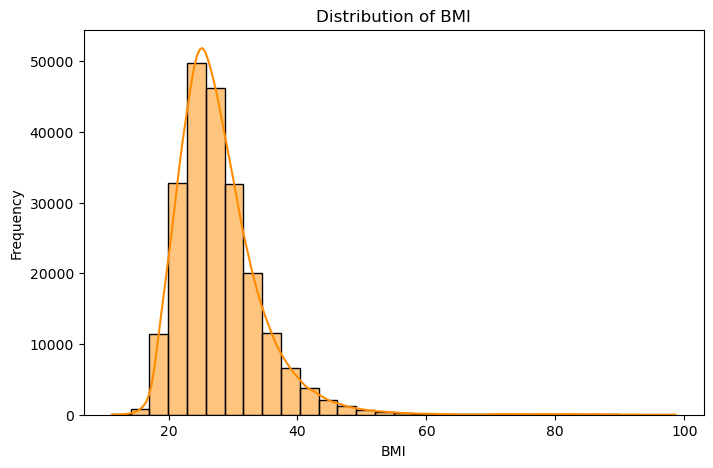

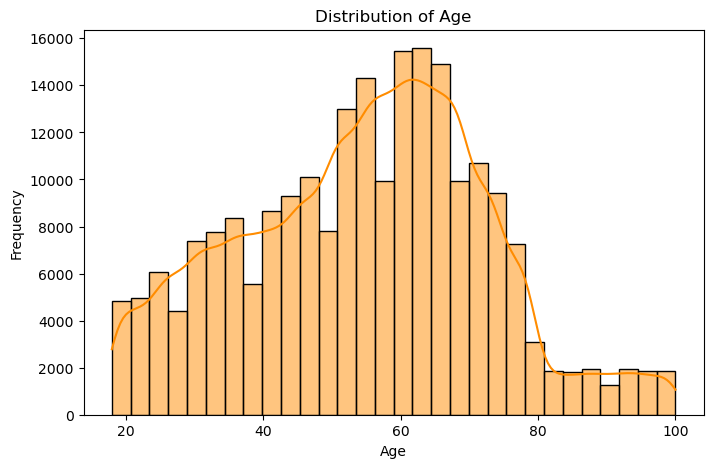

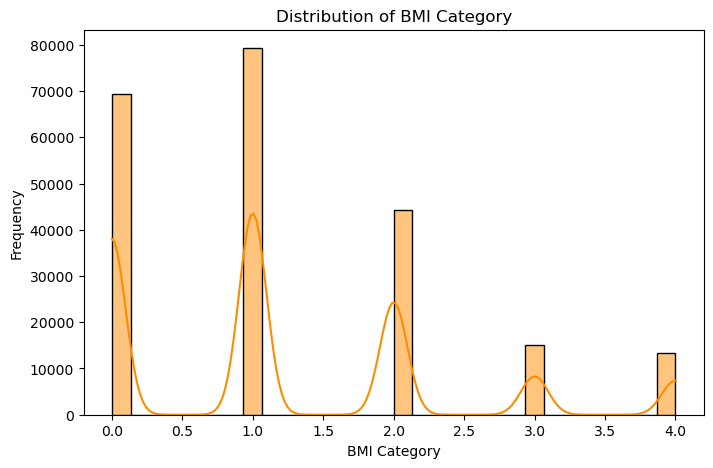

In [509]:
numerical_columns = ['BMI','Age','BMI Category']
plot_histograms(df, numerical_columns)

In [859]:
df.keys()

Index(['HeartDisease', 'BloodPressure', 'High_Cholesterol',
       'Cholesterol_Checked', 'BMI', 'Smoked', 'Stroke', 'Diabetes',
       'Exercise_Activity', 'Alcohol_Consumption', 'Health_Care',
       'Doctor_Visit_Cost_Barrier', 'General_Health', 'Difficulty_Walking',
       'Sex', 'Education', 'Age', 'Fruit_Intake', 'income_min', 'income_max',
       'BMI Category'],
      dtype='object')

In [1132]:
no_data = df[df['HeartDisease'] == 'No']
yes_data = df[df['HeartDisease'] == 'Yes']

In [1133]:
no_data_sampled = no_data.sample(n=50068, random_state=42)
balanced_df = pd.concat([no_data_sampled, yes_data])

In [1134]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
# encoder = LabelEncoder()

In [1135]:


label_mappings = {}

for col in balanced_df.select_dtypes('object'):
    balanced_df[col] = encoder.fit_transform(balanced_df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: HeartDisease
0 -> No
1 -> Yes

Column: BloodPressure
0 -> No
1 -> Yes

Column: High_Cholesterol
0 -> No
1 -> Yes

Column: Cholesterol_Checked
0 -> No
1 -> Yes

Column: Smoked
0 -> No
1 -> Yes

Column: Stroke
0 -> No
1 -> Yes

Column: Diabetes
0 -> No
1 -> Yes

Column: Exercise_Activity
0 -> No
1 -> Yes

Column: Alcohol_Consumption
0 -> No
1 -> Yes

Column: Health_Care
0 -> No
1 -> Yes

Column: Doctor_Visit_Cost_Barrier
0 -> No
1 -> Yes

Column: General_Health
0 -> Excellent
1 -> Fair
2 -> Good
3 -> Poor
4 -> Very Poor

Column: Difficulty_Walking
0 -> No
1 -> Yes

Column: Sex
0 -> Female
1 -> Male

Column: Education
0 -> College graduate
1 -> Elementary
2 -> High school graduate
3 -> Never attended school
4 -> technical school

Column: Fruit_Intake
0 -> No
1 -> Yes



In [1136]:
balanced_df['Education'] = balanced_df['Education'].replace({0: 0, # ไล่จาก ดีสุด = 0 ไล่มาถึง 4
                                           1: 3,
                                           2: 1,
                                           3: 4,
                                           4: 2
                                           })

In [1137]:
bins = [10, 30, 40, 50, 60, 80,100,120]  
labels = [1, 2, 3, 4, 5,6,7]  

balanced_df['Age Group'] = pd.cut(balanced_df['Age'], bins=bins, labels=labels, right=False)
balanced_df['Age Group'] = balanced_df['Age Group'].astype(int)

In [1138]:
balanced_df.head()

,HeartDisease,BloodPressure,High_Cholesterol,Cholesterol_Checked,BMI,Smoked,Stroke,Diabetes,Exercise_Activity,Alcohol_Consumption,...,General_Health,Difficulty_Walking,Sex,Education,Age,Fruit_Intake,income_min,income_max,BMI Category,Age Group
74115,0,1,1,1,38.40,1,0,0,0,0,...,2,0,0,2,51,0,15000,20000,3,4
182575,0,0,1,1,23.88,0,0,0,1,0,...,0,0,0,2,78,1,50000,75000,0,5
215448,0,0,0,1,24.88,1,0,0,1,0,...,2,0,1,0,33,1,25000,35000,0,2
192396,0,0,1,1,32.00,0,0,0,1,0,...,1,0,0,2,50,1,10000,15000,2,4
219398,0,1,0,1,24.62,0,0,0,0,0,...,1,0,1,2,56,1,15000,20000,0,4


In [1139]:
balanced_df.keys()

Index(['HeartDisease', 'BloodPressure', 'High_Cholesterol',
       'Cholesterol_Checked', 'BMI', 'Smoked', 'Stroke', 'Diabetes',
       'Exercise_Activity', 'Alcohol_Consumption', 'Health_Care',
       'Doctor_Visit_Cost_Barrier', 'General_Health', 'Difficulty_Walking',
       'Sex', 'Education', 'Age', 'Fruit_Intake', 'income_min', 'income_max',
       'BMI Category', 'Age Group'],
      dtype='object')

In [1140]:
balanced_df['BMIxAge'] = balanced_df['BMI'] * balanced_df['Age']

# ผลลบกับร่างกาย

balanced_df['HighBloodPressure_in_Diabetes'] = balanced_df['BloodPressure'] * balanced_df['Diabetes']
balanced_df['HighBloodPressure_in_High_Cholesterol'] = balanced_df['BloodPressure'] * balanced_df['High_Cholesterol']
balanced_df['HighBloodPressure_in_Smoked'] = balanced_df['BloodPressure'] * balanced_df['Smoked']
balanced_df['HighBloodPressure_in_Stroke'] = balanced_df['BloodPressure'] * balanced_df['Stroke']
balanced_df['High_Cholesterol_in_Alcohol'] = balanced_df['High_Cholesterol'] * balanced_df['Alcohol_Consumption']

balanced_df['Did_u_Cholesterol_Checked'] = balanced_df['Cholesterol_Checked'] * balanced_df['High_Cholesterol']
balanced_df['DiabetesxSmoked'] = balanced_df['Diabetes'] * balanced_df['Smoked']

balanced_df['BMI_Category_BloodPressure'] = balanced_df['BMI Category'] * balanced_df['BloodPressure'] + balanced_df['Diabetes']


# ผลดีกับร่างกาย

balanced_df['Fruit_x_Exercise'] = balanced_df['Exercise_Activity'] * balanced_df['Fruit_Intake']
balanced_df['Fruit_x_Exercise&General_Health'] = balanced_df['Fruit_x_Exercise'] + balanced_df['General_Health']
balanced_df['VegFruit_x_GeneralHealth'] = balanced_df['Fruit_Intake'] * balanced_df['General_Health']


In [1141]:
balanced_df['HighBloodPressure_Diabetes_Stroke'] = balanced_df['BloodPressure'] * balanced_df['Diabetes'] * balanced_df['Stroke']
balanced_df['HighBloodPressure_Cholesterol_Smoked'] = balanced_df['BloodPressure'] * balanced_df['High_Cholesterol'] * balanced_df['Smoked']
balanced_df['HighBloodPressure_Stroke_Smoked'] = balanced_df['BloodPressure'] * balanced_df['Stroke'] * balanced_df['Smoked']
balanced_df['High_Cholesterol_Alcohol_Smoked'] = balanced_df['High_Cholesterol'] * balanced_df['Alcohol_Consumption'] * balanced_df['Smoked']
balanced_df['Diabetes_Smoked_Alcohol'] = balanced_df['Diabetes'] * balanced_df['Smoked'] * balanced_df['Alcohol_Consumption']

balanced_df['BMIxAge_Risk'] = balanced_df['BMIxAge'] * (balanced_df['BloodPressure'] + balanced_df['Diabetes'] + balanced_df['Stroke'])
balanced_df['BMI_Category_Disease'] = balanced_df['BMI Category'] * (balanced_df['BloodPressure'] + balanced_df['Diabetes'] + balanced_df['High_Cholesterol'] + balanced_df['Stroke'])
balanced_df['Diabetes_Smoked_Cholesterol'] = balanced_df['Diabetes'] * balanced_df['Smoked'] * balanced_df['High_Cholesterol']

balanced_df['HealthRisk_Score'] = (
    balanced_df['BloodPressure'] + 
    balanced_df['High_Cholesterol'] + 
    balanced_df['Stroke'] + 
    balanced_df['Diabetes'] + 
    balanced_df['Smoked'] + 
    balanced_df['Alcohol_Consumption']
)


In [1142]:
balanced_df['Exercise_Health_Index'] = balanced_df['Exercise_Activity'] * (balanced_df['General_Health'] + balanced_df['Fruit_Intake'])
balanced_df['Healthy_Diet_Lifestyle'] = balanced_df['Fruit_x_Exercise'] * balanced_df['General_Health']
balanced_df['VegFruit_x_Exercise_x_Health'] = balanced_df['VegFruit_x_GeneralHealth'] * balanced_df['Exercise_Activity']


In [1143]:
# รวมปัจจัยเสี่ยงเข้าด้วยกัน
balanced_df['Total_Risk_Factors'] = (
    balanced_df['BloodPressure'] + 
    balanced_df['High_Cholesterol'] + 
    balanced_df['Stroke'] + 
    balanced_df['Diabetes'] + 
    balanced_df['Smoked'] + 
    balanced_df['Alcohol_Consumption'] + 
    balanced_df['Difficulty_Walking']
)

# รวมปัจจัยที่ช่วยเพิ่มสุขภาพ
balanced_df['Total_Health_Factors'] = (
    balanced_df['Exercise_Activity'] + 
    balanced_df['Fruit_Intake'] + 
    (4 - balanced_df['General_Health'])  
)

# อัตราส่วนของสุขภาพต่อความเสี่ยง
balanced_df['Health_to_Risk_Ratio'] = (
    balanced_df['Total_Health_Factors'] / (balanced_df['Total_Risk_Factors'] + 1)  # บวก 1 เพื่อป้องกันหารด้วย 0
)

# รวมโรคร้ายแรง
balanced_df['Severe_Disease_Factor'] = (
    balanced_df['Stroke'] + 
    balanced_df['Diabetes']
)

# BMI interaction
balanced_df['BMI_Risk_Score'] = balanced_df['BMI'] * balanced_df['Total_Risk_Factors']
balanced_df['BMI_Health_Score'] = balanced_df['BMI'] * balanced_df['Total_Health_Factors']
balanced_df['BMIxAge_Health'] = balanced_df['BMIxAge'] / (balanced_df['Total_Health_Factors'] + 1)


In [1144]:
balanced_df['BMI_squared'] = balanced_df['BMI'] ** 2
balanced_df['Age_squared'] = balanced_df['Age'] ** 2
balanced_df['BMIxAge_squared'] = balanced_df['BMIxAge'] ** 2
balanced_df['HealthRisk_Score_squared'] = balanced_df['HealthRisk_Score'] ** 2
balanced_df['Healthy_Lifestyle_Score_squared'] = balanced_df['Total_Health_Factors'] ** 2
balanced_df['BMI_log'] = np.log(balanced_df['BMI'] + 1)
balanced_df['Age_log'] = np.log(balanced_df['Age'] + 1)
balanced_df['BMIxAge_log'] = np.log(balanced_df['BMIxAge'] + 1)
balanced_df['HealthRisk_Score_log'] = np.log(balanced_df['HealthRisk_Score'] + 1)

# อัตราส่วนของสุขภาพต่อความเสี่ยง
balanced_df['HealthRisk_Ratio'] = balanced_df['HealthRisk_Score'] / (balanced_df['Total_Health_Factors'] + 1)



In [1147]:
selected_features = [
    'Total_Risk_Factors',
    'HealthRisk_Ratio',
    'Age Group',
    'Health_to_Risk_Ratio',
    'Age_squared',
    'BMIxAge_Risk',
    'General_Health',
    'Sex',
    'Stroke',
    'Did_u_Cholesterol_Checked',
    'BMIxAge_log',
    'Alcohol_Consumption',
    'HighBloodPressure_Cholesterol_Smoked',
    'High_Cholesterol',
    'BMIxAge_squared',
    'HeartDisease',
    'Difficulty_Walking', 
    'Doctor_Visit_Cost_Barrier',
    'Diabetes',
    'BloodPressure',
    'Total_Health_Factors',
    'BMI_Risk_Score',
    'BMI_Health_Score',
    'BMIxAge_Health'

]

balanced_df = balanced_df[selected_features]

In [1148]:
from sklearn.model_selection import train_test_split

X = balanced_df.drop('HeartDisease',axis = 1)
y = balanced_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(54508, 23) (13628, 23)


In [1163]:
len(y_train[y_train == 1])

14419

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

def tune_hyperparameters(clf, param_grid, X_train, y_train):

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    f2_scorer = make_scorer(fbeta_score, beta=1.5)

    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f2_scorer, n_jobs=-1)

    clf_grid.fit(X_train, y_train)

    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    return clf_grid.best_estimator_

In [ ]:
xgb_param_grid = {
    'max_depth': [5, 6],
    'learning_rate': [0.04, 0.05, 0.06],
    'n_estimators': [150, 200],
    'subsample': [0.8, 0.9, 1],  
    'colsample_bytree': [ 0.5, 0.8],
    'reg_lambda': [0.05, 0.1, 0.2],  
    'scale_pos_weight': [1.2, 1.5, 2.0] 
}

In [1172]:
xgb = XGBClassifier(random_state=0)
xgb_opt = tune_hyperparameters(xgb, xgb_param_grid, X_train, y_train)

Best hyperparameters:
 {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'reg_lambda': 0.2, 'scale_pos_weight': 2.0, 'subsample': 1}


In [ ]:
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score

def custom_f2_scorer(y_true, y_pred):
    f2 = fbeta_score(y_true, y_pred, beta=1.5)

    return f2

f2_scorer = make_scorer(custom_f2_scorer)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

random_search = RandomizedSearchCV(
    xgb_opt,  
    param_distributions=xgb_param_grid,  
    cv=cv,  
    scoring=f2_scorer,  
    n_iter=100,
    verbose=2,  
    n_jobs=-1  
)

In [1056]:
random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best F2 Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'subsample': 0.9, 'scale_pos_weight': 3.5, 'reg_lambda': 0.05, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best F2 Score: 0.7036843841177959


In [ ]:
xgb_opt = XGBClassifier(max_depth=5,
                        learning_rate=0.05,
                        n_estimators=150,  
                        subsample=1,
                        reg_lambda =0.2,
                        colsample_bytree=0.5,
                        scale_pos_weight=2,
                        min_child_weight = 1,
                        gamma = 0
)

xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1176]:
y_pred_class = xgb_opt.predict(X_test)

In [1177]:
weights = xgb_opt.feature_importances_

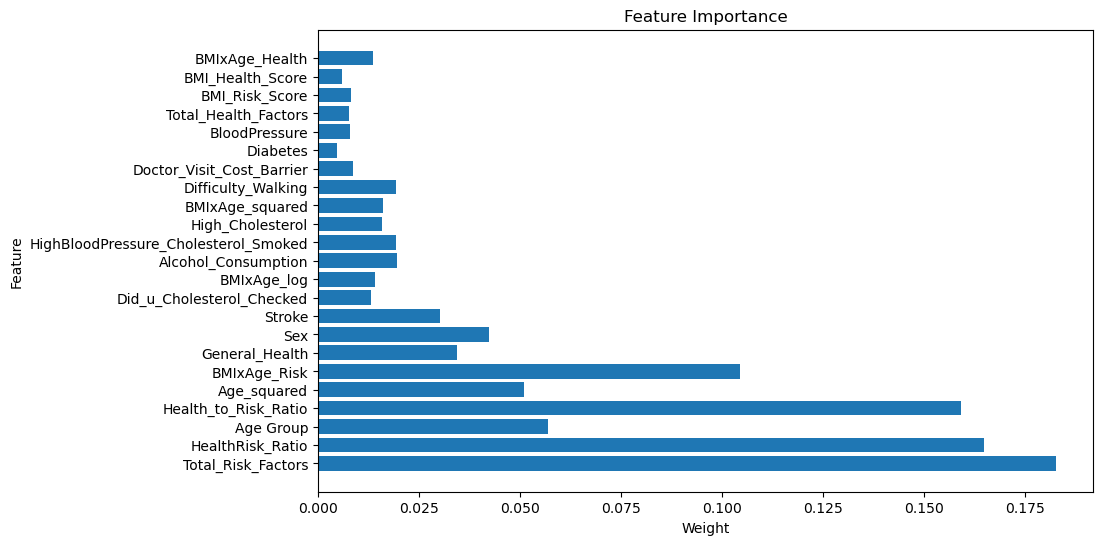

Weights (Coefficients):
Total_Risk_Factors: 0.18261173367500305
HealthRisk_Ratio: 0.16488958895206451
Age Group: 0.056893445551395416
Health_to_Risk_Ratio: 0.15901312232017517
Age_squared: 0.050886888056993484
BMIxAge_Risk: 0.10455337911844254
General_Health: 0.03448527678847313
Sex: 0.042372915893793106
Stroke: 0.030094081535935402
Did_u_Cholesterol_Checked: 0.013213527388870716
BMIxAge_log: 0.014227108098566532
Alcohol_Consumption: 0.019498120993375778
HighBloodPressure_Cholesterol_Smoked: 0.019360171630978584
High_Cholesterol: 0.015938738361001015
BMIxAge_squared: 0.016011325642466545
Difficulty_Walking: 0.01929537020623684
Doctor_Visit_Cost_Barrier: 0.008578358218073845
Diabetes: 0.004714727867394686
BloodPressure: 0.007888024672865868
Total_Health_Factors: 0.0077753132209181786
BMI_Risk_Score: 0.008194029331207275
BMI_Health_Score: 0.00585136329755187
BMIxAge_Health: 0.013653360307216644


In [1178]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, weights)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

print("Weights (Coefficients):")
for feature, weight in zip(X.columns, weights):
  print(f"{feature}: {weight}")

In [1179]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F2 Score: {f2:.4f}")

evaluate_model(y_test, y_pred_class)

Precision: 0.5826
Recall: 0.7597
F1 Score: 0.6595
F2 Score: 0.7161


# Predict Test Data

In [1181]:
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df_test = pd.read_csv('test.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds\n")
print("Number of rows : ",df_test.shape[0]," and the number of columns : ",df_test.shape[1])
missing_values = df_test.isna().sum().sum()
duplicated_values = df_test.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df_test.isna().sum())
print("\nUnique Values in Each Column:")
print(df_test.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.18 seconds

Number of rows :  74361  and the number of columns :  19

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
ID                                        74361
High Blood Pressure                           2
Told High Cholesterol                         2
Cholesterol Checked                           2
Body Mass Index                            3921
Smoked 100+ Cigarettes                        2
Diagnosed Stroke                              2
Diagnosed Diabetes                            2
Leisure Physical Activity                     2
Heavy Alcohol Consumption                     2
Health Care Coverage                          2
Doctor Visit Cost Barrier                     2
General Health                                5
Difficulty Walking                            2
Sex                                           2
Education Level                               6
Income 

In [1182]:
df_test.rename(columns={
    'History of HeartDisease or Attack': 'HeartDisease',
    'High Blood Pressure': 'BloodPressure',
    'Told High Cholesterol': 'High_Cholesterol',
    'Cholesterol Checked': 'Cholesterol_Checked',
    'Body Mass Index': 'BMI',
    'Smoked 100+ Cigarettes': 'Smoked',
    'Diagnosed Stroke': 'Stroke',
    'Diagnosed Diabetes': 'Diabetes',
    'Leisure Physical Activity': 'Exercise_Activity',
    'Vegetable or Fruit Intake (1+ per Day)': 'Fruit_Intake',
    'Heavy Alcohol Consumption': 'Alcohol_Consumption',
    'Health Care Coverage': 'Health_Care',
    'Doctor Visit Cost Barrier': 'Doctor_Visit_Cost_Barrier',
    'General Health': 'General_Health',
    'Difficulty Walking': 'Difficulty_Walking',
    'Sex': 'Sex',
    'Age': 'Age',
    'Education Level': 'Education',
    'Income Level': 'Income'
}, inplace=True)


In [1183]:
import pandas as pd
import re


def parse_income_range(text):
    text = text.strip()
    text = text.lstrip("(")
    

    m = re.match(r"^\$([\d,]+)\s+or\s+more", text, re.IGNORECASE)
    if m:
        income_min = int(m.group(1).replace(",", ""))
        income_max = 75000
        return pd.Series([income_min, income_max])

    m = re.match(r"^\$([\d,]+)\s+to\s+(?:less than\s+)?\$([\d,]+)", text, re.IGNORECASE)
    if m:
        income_min = int(m.group(1).replace(",", ""))
        income_max = int(m.group(2).replace(",", ""))
        return pd.Series([income_min, income_max])
    
    m = re.match(r"^Less\s+than\s+\$([\d,]+)", text, re.IGNORECASE)
    if m:
        income_min = 3600 # เงินรายชั่วโมงขั้นต่ำ 15 $ ต่อชั่วโมง 15 * 8 * 30
        income_max = int(m.group(1).replace(",", ""))
        return pd.Series([income_min, income_max])
    
    return pd.Series([3600, 10000])

df_test[['income_min', 'income_max']] = df_test['Income'].apply(parse_income_range)

print(df_test[['Income', 'income_min', 'income_max']].head())
df_test = df_test.drop(columns=['Income','ID'])

                         Income  income_min  income_max
0  $20,000 to less than $25,000       20000       25000
1  $50,000 to less than $75,000       50000       75000
2             Less than $10,000        3600       10000
3  $50,000 to less than $75,000       50000       75000
4  $25,000 to less than $35,000       25000       35000


In [ ]:
def categorize_BMI(row):
    if row['Sex'] == 'Male':
        if row['BMI'] < 18.5:
            return 0  
        elif 18.5 <= row['BMI'] <= 24.9:
            return 0  
        elif 25 <= row['BMI'] <= 29.9:
            return 1  
        elif 30 <= row['BMI'] <= 34.9:
            return 2  
        elif 35 <= row['BMI'] <= 39.9:
            return 3  
        else:
            return 4  
    else:
        if row['BMI'] < 18.5:
            return 0  
        elif 18.5 <= row['BMI'] <= 23.9:
            return 0  
        elif 24 <= row['BMI'] <= 28.9:
            return 1  
        elif 29 <= row['BMI'] <= 34.9:
            return 2  
        elif 35 <= row['BMI'] <= 39.9:
            return 3  
        else:
            return 4  

df_test['BMI Category'] = df_test.apply(categorize_BMI, axis=1)

In [1185]:
df_test['Education'] = df_test['Education'].replace({
    'Some college or technical school': 'technical school',
    'Some high school': 'High school graduate'
})

In [1186]:
label_mappings = {}

for col in df_test.select_dtypes('object'):
    df_test[col] = encoder.fit_transform(df_test[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: BloodPressure
0 -> No
1 -> Yes

Column: High_Cholesterol
0 -> No
1 -> Yes

Column: Cholesterol_Checked
0 -> No
1 -> Yes

Column: Smoked
0 -> No
1 -> Yes

Column: Stroke
0 -> No
1 -> Yes

Column: Diabetes
0 -> No
1 -> Yes

Column: Exercise_Activity
0 -> No
1 -> Yes

Column: Alcohol_Consumption
0 -> No
1 -> Yes

Column: Health_Care
0 -> No
1 -> Yes

Column: Doctor_Visit_Cost_Barrier
0 -> No
1 -> Yes

Column: General_Health
0 -> Excellent
1 -> Fair
2 -> Good
3 -> Poor
4 -> Very Poor

Column: Difficulty_Walking
0 -> No
1 -> Yes

Column: Sex
0 -> Female
1 -> Male

Column: Education
0 -> College graduate
1 -> Elementary
2 -> High school graduate
3 -> Never attended school
4 -> technical school

Column: Fruit_Intake
0 -> No
1 -> Yes



In [1187]:
df_test['Education'] = df_test['Education'].replace({0: 0, # ไล่จาก ดีสุด = 0 ไล่มาถึง 4
                                           1: 3,
                                           2: 1,
                                           3: 4,
                                           4: 2
                                           })

In [1188]:
bins = [10, 30, 40, 50, 60, 80,100,120]  
labels = [1, 2, 3, 4, 5,6,7]  

df_test['Age Group'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)
df_test['Age Group'] = df_test['Age Group'].astype(int)

In [1189]:
df_test['BMIxAge'] = df_test['BMI'] * df_test['Age']

# ผลลบกับร่างกาย

df_test['HighBloodPressure_in_Diabetes'] = df_test['BloodPressure'] * df_test['Diabetes']
df_test['HighBloodPressure_in_High_Cholesterol'] = df_test['BloodPressure'] * df_test['High_Cholesterol']
df_test['HighBloodPressure_in_Smoked'] = df_test['BloodPressure'] * df_test['Smoked']
df_test['HighBloodPressure_in_Stroke'] = df_test['BloodPressure'] * df_test['Stroke']
df_test['High_Cholesterol_in_Alcohol'] = df_test['High_Cholesterol'] * df_test['Alcohol_Consumption']

df_test['Did_u_Cholesterol_Checked'] = df_test['Cholesterol_Checked'] * df_test['High_Cholesterol']
df_test['DiabetesxSmoked'] = df_test['Diabetes'] * df_test['Smoked']

df_test['BMI_Category_BloodPressure'] = df_test['BMI Category'] * df_test['BloodPressure'] + df_test['Diabetes']


# ผลดีกับร่างกาย

df_test['Fruit_x_Exercise'] = df_test['Exercise_Activity'] * df_test['Fruit_Intake']
df_test['Fruit_x_Exercise&General_Health'] = df_test['Fruit_x_Exercise'] + df_test['General_Health']
df_test['VegFruit_x_GeneralHealth'] = df_test['Fruit_Intake'] * df_test['General_Health']


In [1190]:
df_test['HighBloodPressure_Diabetes_Stroke'] = df_test['BloodPressure'] * df_test['Diabetes'] * df_test['Stroke']
df_test['HighBloodPressure_Cholesterol_Smoked'] = df_test['BloodPressure'] * df_test['High_Cholesterol'] * df_test['Smoked']
df_test['HighBloodPressure_Stroke_Smoked'] = df_test['BloodPressure'] * df_test['Stroke'] * df_test['Smoked']
df_test['High_Cholesterol_Alcohol_Smoked'] = df_test['High_Cholesterol'] * df_test['Alcohol_Consumption'] * df_test['Smoked']
df_test['Diabetes_Smoked_Alcohol'] = df_test['Diabetes'] * df_test['Smoked'] * df_test['Alcohol_Consumption']

df_test['BMIxAge_Risk'] = df_test['BMIxAge'] * (df_test['BloodPressure'] + df_test['Diabetes'] + df_test['Stroke'])
df_test['BMI_Category_Disease'] = df_test['BMI Category'] * (df_test['BloodPressure'] + df_test['Diabetes'] + df_test['High_Cholesterol'] + df_test['Stroke'])
df_test['Diabetes_Smoked_Cholesterol'] = df_test['Diabetes'] * df_test['Smoked'] * df_test['High_Cholesterol']

df_test['HealthRisk_Score'] = (
    df_test['BloodPressure'] + 
    df_test['High_Cholesterol'] + 
    df_test['Stroke'] + 
    df_test['Diabetes'] + 
    df_test['Smoked'] + 
    df_test['Alcohol_Consumption']
)


In [1191]:
df_test['Exercise_Health_Index'] = df_test['Exercise_Activity'] * (df_test['General_Health'] + df_test['Fruit_Intake'])
df_test['Healthy_Diet_Lifestyle'] = df_test['Fruit_x_Exercise'] * df_test['General_Health']
df_test['VegFruit_x_Exercise_x_Health'] = df_test['VegFruit_x_GeneralHealth'] * df_test['Exercise_Activity']


In [1192]:
# รวมปัจจัยเสี่ยงเข้าด้วยกัน
df_test['Total_Risk_Factors'] = (
    df_test['BloodPressure'] + 
    df_test['High_Cholesterol'] + 
    df_test['Stroke'] + 
    df_test['Diabetes'] + 
    df_test['Smoked'] + 
    df_test['Alcohol_Consumption'] + 
    df_test['Difficulty_Walking']
)

# รวมปัจจัยที่ช่วยเพิ่มสุขภาพ
df_test['Total_Health_Factors'] = (
    df_test['Exercise_Activity'] + 
    df_test['Fruit_Intake'] + 
    (4 - df_test['General_Health'])  
)

# อัตราส่วนของสุขภาพต่อความเสี่ยง
df_test['Health_to_Risk_Ratio'] = (
    df_test['Total_Health_Factors'] / (df_test['Total_Risk_Factors'] + 1)  # บวก 1 เพื่อป้องกันหารด้วย 0
)

# รวมโรคร้ายแรง
df_test['Severe_Disease_Factor'] = (
    df_test['Stroke'] +  
    df_test['Diabetes']
)

# BMI interaction
df_test['BMI_Risk_Score'] = df_test['BMI'] * df_test['Total_Risk_Factors']
df_test['BMI_Health_Score'] = df_test['BMI'] * df_test['Total_Health_Factors']
df_test['BMIxAge_Health'] = df_test['BMIxAge'] / (df_test['Total_Health_Factors'] + 1)


In [1193]:
df_test['BMI_squared'] = df_test['BMI'] ** 2
df_test['Age_squared'] = df_test['Age'] ** 2
df_test['BMIxAge_squared'] = df_test['BMIxAge'] ** 2
df_test['HealthRisk_Score_squared'] = df_test['HealthRisk_Score'] ** 2
df_test['Healthy_Lifestyle_Score_squared'] = df_test['Total_Health_Factors'] ** 2
df_test['BMI_log'] = np.log(df_test['BMI'] + 1)
df_test['Age_log'] = np.log(df_test['Age'] + 1)
df_test['BMIxAge_log'] = np.log(df_test['BMIxAge'] + 1)
df_test['HealthRisk_Score_log'] = np.log(df_test['HealthRisk_Score'] + 1)

# อัตราส่วนของสุขภาพต่อความเสี่ยง
df_test['HealthRisk_Ratio'] = df_test['HealthRisk_Score'] / (df_test['Total_Health_Factors'] + 1)



In [1195]:
selected_features = [
    'Total_Risk_Factors',
    'HealthRisk_Ratio',
    'Age Group',
    'Health_to_Risk_Ratio',
    'Age_squared',
    'BMIxAge_Risk',
    'General_Health',
    'Sex',
    'Stroke',
    'Did_u_Cholesterol_Checked',
    'BMIxAge_log',
    'Alcohol_Consumption',
    'HighBloodPressure_Cholesterol_Smoked',
    'High_Cholesterol',
    'BMIxAge_squared',
    'Difficulty_Walking', 
    'Doctor_Visit_Cost_Barrier',
    'Diabetes',
    'BloodPressure',
    'Total_Health_Factors',
    'BMI_Risk_Score',
    'BMI_Health_Score',
    'BMIxAge_Health'

]

df_test = df_test[selected_features]

In [1196]:
df_test.keys()

Index(['Total_Risk_Factors', 'HealthRisk_Ratio', 'Age Group',
       'Health_to_Risk_Ratio', 'Age_squared', 'BMIxAge_Risk', 'General_Health',
       'Sex', 'Stroke', 'Did_u_Cholesterol_Checked', 'BMIxAge_log',
       'Alcohol_Consumption', 'HighBloodPressure_Cholesterol_Smoked',
       'High_Cholesterol', 'BMIxAge_squared', 'Difficulty_Walking',
       'Doctor_Visit_Cost_Barrier', 'Diabetes', 'BloodPressure',
       'Total_Health_Factors', 'BMI_Risk_Score', 'BMI_Health_Score',
       'BMIxAge_Health'],
      dtype='object')

In [1197]:
y_pred_class = xgb_opt.predict(df_test)

In [1198]:
print("Loading data file now, this could take a while depending on file size")
start = time.time()
Submission = pd.read_csv('sample_submission.csv')
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds\n")
print("Number of rows : ",Submission.shape[0]," and the number of columns : ",Submission.shape[1])

Loading data file now, this could take a while depending on file size
Loading took 0.03 seconds

Number of rows :  74361  and the number of columns :  2


In [1199]:
Submission["History of HeartDisease or Attack"] = y_pred_class

In [1200]:
Submission['History of HeartDisease or Attack'] = Submission['History of HeartDisease or Attack'].replace({0: "No", 1:"Yes"})

In [1201]:
Submission

,ID,History of HeartDisease or Attack
0,test_000001,No
1,test_000002,No
2,test_000003,Yes
3,test_000004,No
4,test_000005,No
...,...,...
74356,test_074357,No
74357,test_074358,Yes
74358,test_074359,Yes
74359,test_074360,Yes


In [1202]:
Submission.to_csv('my_submission.csv', index=False)

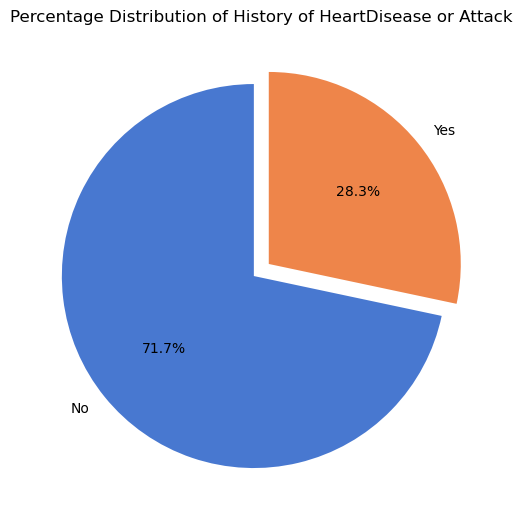

History of HeartDisease or Attack
No                                   53295
Yes                                  21066
Name: count, dtype: int64


In [1203]:
columns_to_plot = ['History of HeartDisease or Attack']
plot_categorical_distributions(columns_to_plot,data=Submission)

34.4 -> 0.55003
===================
34.6 -> 0.54881
===================
33.0 -> 0.54813
===================
14.6 -> 0.47713
===================
